In [1]:
import numpy as np
import pandas as pd
import datetime

# visualization
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,4)
# plt.rcParams['figure.dpi'] = 150

#
colors = ['#F0D290','#DE834D','#A3423C','#781D42']
colors2 = ['#f0d290','#e9c083','#e2af77','#d99d6d','#d08c64',
          '#c67b5d','#bc6b56','#b05a51','#a34b4d','#963b49',
          '#872c45','#781d42']

## Data
[dataset source](https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls)

In [2]:
# loading data & check dataset shape
df = pd.read_excel('../datasets/Sample - Superstore.xls')
df.shape

(9994, 21)

# 1. Data Exploration

In [3]:
### verifying that each column has the appropriate data type
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

#### correlation matrix

In [4]:
# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# # plot correlation metric between all possible pairs of numeric variables the dataframe
# sns.heatmap(df.corr(), mask=mask, annot=True, square=True);

#### How much Furniture data represent out of the whole data? 
Answer : 21%

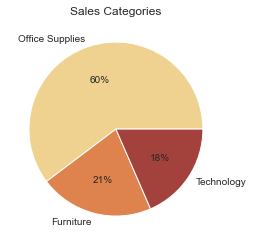

In [5]:
data = df['Category'].value_counts()
plt.title('Sales Categories')
plt.pie(data, 
        labels=data.index,
        colors=colors,
        autopct='%.0f%%');

#### What are the subcategories of Furniture?
Answer : <br>
45% Furnishings <br>
29% Chairs <br>
15% Tables <br>
11% Bookcases <br>

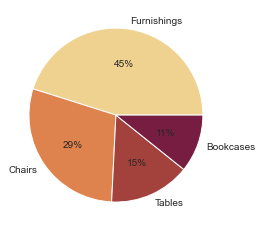

In [6]:
data = df[df['Category'] == 'Furniture']['Sub-Category'].value_counts()
plt.pie(data, 
        labels=data.index,
        colors=colors,
        autopct='%.0f%%');

#### Since we are interested in Furniture category we will drop non-Furniture data

In [7]:
df = df[df['Category'] == 'Furniture'].reset_index()
df.shape

(2121, 22)

#### Is there any missing values or duplicated rows ?
Answer : No

In [8]:
print(f'Number of missing values is {df.isna().sum().sum()}\nNumber of duplicated rows is {df.duplicated().sum()}')

Number of missing values is 0
Number of duplicated rows is 0


#### Any wrong data in the Sales column ?
Answer : No

In [9]:
print('Number of transactions has Sales <= 0 is ' + str(df[df['Sales'] <= 0].shape[0]))

Number of transactions has Sales <= 0 is 0


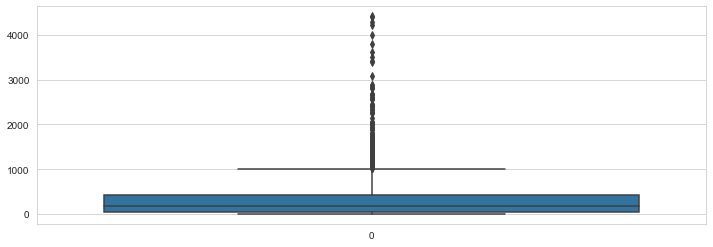

In [10]:
sns.boxplot(data=df['Sales']);

#### Any wrong data in the Profit column ?
Answer : No; Having negative profit seems to be normal scinse the store put big discounts on some products.

In [11]:
print('Number of transactions has Sales <= 0 is ' + str(df[df['Profit'] <= 0].shape[0]))

Number of transactions has Sales <= 0 is 747


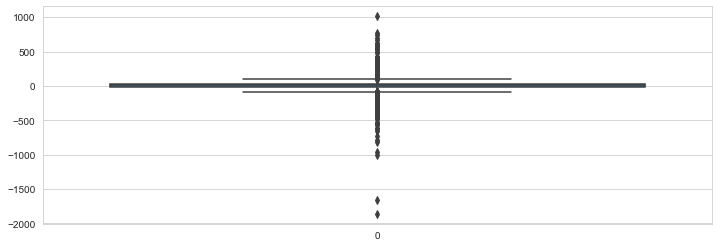

In [12]:
sns.boxplot(data=df['Profit']);

#### Overall Sales vs Profit of each year

In [13]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

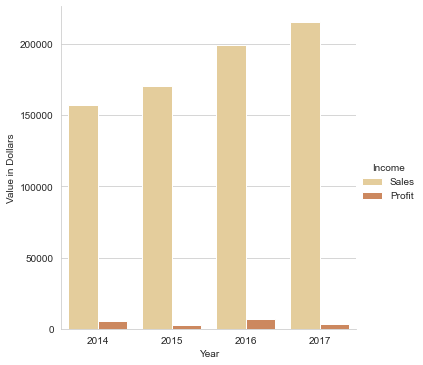

In [14]:
# calculate the Sales & Profit amounts of each Category
data = df.groupby(['Year'])[['Sales', 'Profit']].sum().reset_index()
data = pd.melt(data, id_vars='Year', var_name='Income', value_name='Value in Dollars')

# plot
sns.catplot(data=data, x='Year', y='Value in Dollars', hue='Income',  kind='bar', palette=colors);

#### Is the Sales column take into consideration the Quantity & Discount? 
Answer : Yes

In [15]:
df_ = df[df['Product ID'] == 'FUR-BO-10001798'][['Order Date', 'Product ID', 'Quantity', 'Sales', 'Discount']]
df_['Sales of Single Product'] = df_['Sales'] / df_['Quantity']
df_['Price of Single Product without Discount'] = df_['Sales of Single Product'] / (1 - df_['Discount'])
df_

,Order Date,Product ID,Quantity,Sales,Discount,Sales of Single Product,Price of Single Product without Discount
0,2016-11-08,FUR-BO-10001798,2,261.960,0.00,130.980,130.98
1121,2016-04-09,FUR-BO-10001798,5,556.665,0.15,111.333,130.98
1837,2017-08-25,FUR-BO-10001798,2,130.980,0.50,65.490,130.98
1976,2017-05-01,FUR-BO-10001798,3,314.352,0.20,104.784,130.98


#### Plotting SALES & NUMBER-OF-TRANSACTIONS for each quarter

In [16]:
# plotting function
def plot_per_quarter(data, x, y, y_label, clrs=colors):
    
    colors = ['#F0D290','#DE834D','#A3423C','#781D42']
    
    sns.barplot(data=data, x=x, y=y, palette=clrs);

    plt.ylabel(y_label);
    plt.xlabel('Quarters of the Years');
    plt.xticks(rotation=75)
    plt.show()

In [17]:
# make a copy
df_ = df[['Order Date', 'Sales']].copy()

# extracting month, year and quarter into seperate columns
df_['Year'] = df_['Order Date'].dt.year
df_['Month'] = df_['Order Date'].dt.month
df_['Quarter'] = (df_['Month']-1)//3+1

# group by year & quarter
df_qua = df_.groupby(['Year', 'Quarter'])['Sales'].agg(['sum','count']).sort_values(['Year', 'Quarter']).reset_index()
df_qua['Year Quarter'] = df_qua['Year'].astype(str) + ' - ' + df_qua['Quarter'].astype(str)
# group by year & month
df_mon = df_.groupby(['Year', 'Month'])['Sales'].agg(['sum','count']).sort_values(by=['Year', 'Month']).reset_index()
df_mon['Year Month'] = df_mon['Year'].astype(str) + ' - ' + df_mon['Month'].astype(str)

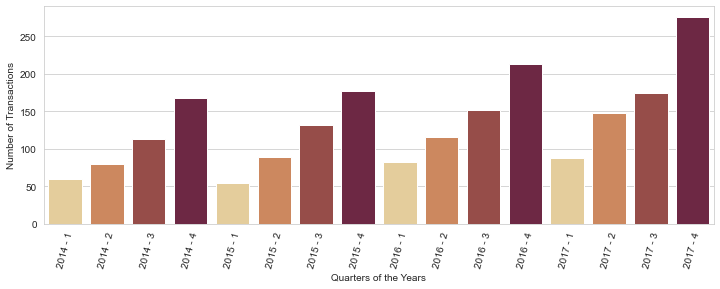

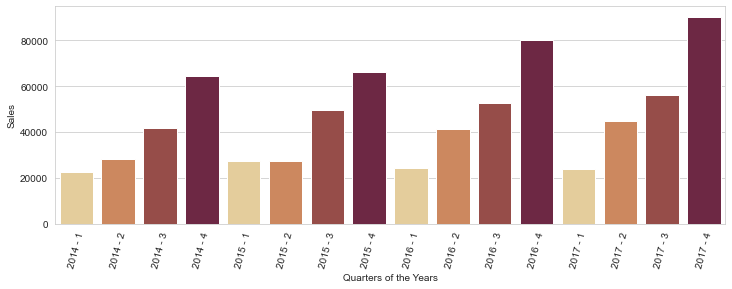

In [18]:
# plot
plot_per_quarter(data=df_qua, x='Year Quarter', y='count', y_label='Number of Transactions')
plot_per_quarter(data=df_qua, x='Year Quarter', y='sum', y_label='Sales')

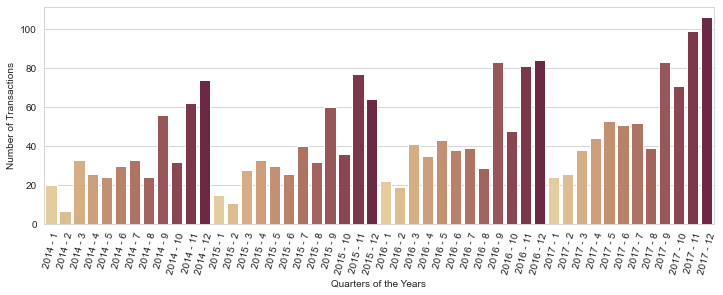

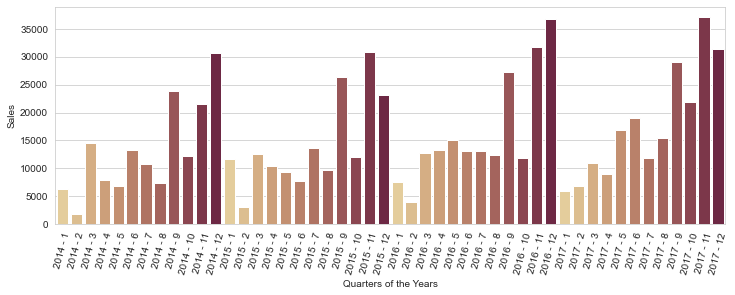

In [19]:
# plot
plot_per_quarter(data=df_mon, x='Year Month', y='count', y_label='Number of Transactions', clrs=colors2)
plot_per_quarter(data=df_mon, x='Year Month', y='sum', y_label='Sales', clrs=colors2)

In [20]:
# # 
# df_ = df[df['Category'] == 'Furniture'].groupby(['Year', 'Quarter'])[['Sales', 'Profit']].agg(
#     Sales=('Sales', 'sum'), 
#     Profit=('Profit','sum'),
#     Number_of_Transactions=('Profit', 'count')).sort_values(['Year', 'Quarter']).reset_index()
# df_['index'] = df_['Year'].astype(str)  + ' Q' + df_['Quarter'].astype(str)

# # 
# li = df_[['index', 'Sales', 'Profit', 'Number_of_Transactions']].to_numpy()
# li_x = []
# li_y = []
# for row in li:
    
#     li_x.append('')
#     li_x.append(row[0] + ' Sales')
#     li_x.append(row[0] + ' Profit')
#     li_x.append(row[0] + ' Number_of_Transactions')
    
#     li_y.append(0)
#     li_y.append(row[1])    
#     li_y.append(row[2])    
#     li_y.append(row[3])  
    
# df_ = pd.DataFrame({'index':li_x, 'values':li_y})

## Data Preprocessing

#### Drop unnecessary columns

In [22]:
df = df[['Order Date', 'Sales']]
df

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2015-10-11,957.5775
3,2014-06-09,48.8600
4,2014-06-09,1706.1840
...,...,...
2116,2015-03-19,383.4656
2117,2016-12-05,13.4000
2118,2015-09-06,85.9800
2119,2014-01-21,25.2480


## Model Selection

#### Base model

#### Trying different models

## Model Development

## Evaluation